## # SNR example, Alan Weinstein for CGWAS 2015

In [1]:
# import the python packages that we need (minimal)
import numpy as np
%matplotlib inline
import matplotlib
#matplotlib.use('MacOSX')
from matplotlib import pyplot as plt

In [2]:
# constants in SI units
# (will need to convert to get answers in km, ergs, ...)

pi = np.pi
c = 299792458.        # m/s
Msun = 1.98892e30     # kg
G = 6.67384e-11       # m**3 / s**2 / kg
pc = 3.085677e16      # parsec, m
Dist = 1.e6*pc        # Distance, 1 Mpc in m

In [3]:
# sampling rate for inspiral evolution
fsamp = 4096    # sampling rate
dt = 1./fsamp   # time step

In [4]:
# binary masses in solar masses
m1 = 1.4 
m2 = 1.4 

In [5]:
# masses in SI units:
M1 = m1*Msun
M2 = m2*Msun
M = M1+M2                         # total mass
Mu = M1*M2/M                      # reduced mass in CMS
Mchirp = M**(2./5.)*Mu**(3./5.)   # chirp mass

In [6]:
# Initial condition: Orbital period of 0.1 s
Porb0 = 0.1
forb0 = 1./Porb0
fGW0 = 2.*forb0
om0 = 2.*pi*forb0
aorb0 = (G*M/om0**2)**(1./3.)       # Kepler's 3rd law
vorb0 = aorb0*om0                   # orbital velocity in cms
borb0 = vorb0/c                     # v/c
Ekin0 = Mu*vorb0**2/2.              # kinetic energy in cms
Epot0 = -G*Mu*M/aorb0               # potential energy in cms
Etot0 = Ekin0+Epot0                 # total energy
# Virial thm: Etot = Ekin + Epot ; Epot = -2*Ekin , Etot = -Ekin = Epot/2
Jorb0 = np.sqrt(G*M*Mu**2*aorb0)    # orbital ang mom
tchirp = 5./(256.*(Mu/M))*(G*M/c**3)/borb0**8   # chirp time

In [7]:
# Questions 1,2,3:
print 'f GW at start = '+str(fGW0)+' Hz'
print 'orbital separation a at start = '+str(aorb0*1.e-3)+' km'
print 'orbital velocity v at start = '+str(vorb0*1.e-3)+' km/s'
print 'v/c at start = '+str(borb0)+' '
print 'Kinetic   energy Ekin at start = '+str(Ekin0*1.e7)+' ergs'
print 'Potential energy Epot at start = '+str(Epot0*1.e7)+' ergs'
print 'Total     energy Etot at start = '+str(Etot0*1.e7)+' ergs'
print 'orbital angular momentum Jorb at start = '+str(Jorb0)+' kg m^2 /s'

f GW at start = 20.0 Hz
orbital separation a at start = 454.915219517 km
orbital velocity v at start = 28583.1662328 km/s
v/c at start = 0.0953431798235 
Kinetic   energy Ekin at start = 5.6872985844e+51 ergs
Potential energy Epot at start = -1.13745971688e+52 ergs
Total     energy Etot at start = -5.6872985844e+51 ergs
orbital angular momentum Jorb at start = 1.81032336509e+43 kg m^2 /s


In [8]:
# Final conditions at ISCO:
aorbI = 6.*G*M/c**2         # end inspiral at ISCO
omI = np.sqrt(G*M/aorbI**3)
forbI = omI/(2.*pi)
fGWI = 2.*forbI
vorbI = aorbI*omI
borbI = vorbI/c
EkinI = Mu*vorbI**2/2.
EpotI = - G*Mu*M/aorbI
EtotI = EkinI+EpotI
JorbI = np.sqrt(G*M*Mu**2*aorbI)

In [9]:
# Questions 4,5,6,7:
print 'f GW at ISCO = '+str(fGWI)+' Hz'
print 'orbital separation a at ISCO = '+str(aorbI*1.e-3)+' km'
print 'orbital velocity v at ISCO = '+str(vorbI*1.e-3)+' km/s'
print 'v/c at ISCO = '+str(borbI)+' '
print 'Kinetic   energy Ekin at ISCO = '+str(EkinI*1.e7)+' ergs'
print 'Potential energy Epot at ISCO = '+str(EpotI*1.e7)+' ergs'
print 'Total     energy Etot at ISCO = '+str(EtotI*1.e7)+' ergs'
print 'orbital angular momentum Jorb at ISCO = '+str(JorbI)+' kg m^2 /s'

f GW at ISCO = 1570.12498212 Hz
orbital separation a at ISCO = 24.8119548018 km
orbital velocity v at ISCO = 122389.758472 km/s
v/c at ISCO = 0.408248290464 
Kinetic   energy Ekin at ISCO = 1.04273875422e+53 ergs
Potential energy Epot at ISCO = -2.08547750844e+53 ergs
Total     energy Etot at ISCO = -1.04273875422e+53 ergs
orbital angular momentum Jorb at ISCO = 4.22786794626e+42 kg m^2 /s


In [10]:
# Questions 8,9:
print 'Energy released from inspiral = '+str((Etot0-EtotI)*1.e7)+' erg'
print 'Energy release in units of Mc^2 = '+str((Etot0-EtotI)/(M*c**2))
print 'Energy flux at 1 Mpc = '+ \
       str((Etot0-EtotI)*1.e7/(4.*pi*(Dist*100.)**2))+' erg/cm^2'

Energy released from inspiral = 9.85865768377e+52 erg
Energy release in units of Mc^2 = 0.019697043091
Energy flux at 1 Mpc = 823.961645702 erg/cm^2


In [11]:
# compute the expected SNR for a CBC at Dist.
# first a frequency vector
fmin = 20.
fmax = 2048.
Nf = 10000                  # number of frequency bins
df = (fmax-fmin)/Nf
f = fmin+np.arange(Nf)*df

In [12]:
# Question 12:
# The iLIGO (SRD) noise curve:
Ssei = 1.0e-36*(f/20.)**(-28)
Sth  = 1.0e-44*(f/62.)**(-4)
Ssh  = 1.0e-46+1.0e-42*(f/7900.)**(2)
Sf = Ssei+Sth+Ssh

In [13]:
# Questions 13,14:
# then the template up to ISCO:
fI = f[f < fGWI]
SfI = Sf[f< fGWI]
# GW strain h(f) in frequency domain,
# optimal location and orientation, distance Dist:
hf = np.sqrt(5*pi/24.)*G**2*Mchirp**2/(c**5*Dist)* \
     np.power(pi*G*Mchirp*fI/c**3,-7./6.)
# the expected SNR for a CBC at Dist.
SNR2 = 4.*np.sum(hf*hf/SfI)*df
SNR = np.sqrt(SNR2)
# A careful evaluation of the detector response 
# averaged over source location and orientation yields:
horizon_to_average = 2.26
BNS_horizon = SNR/8.
BNS_range = BNS_horizon/horizon_to_average

In [14]:
# Questions 14, 15, 16:
print 'SNR at 1 Mpc = '+str(SNR)
print 'Horizon Distance at which the SNR is 8 = '+str(BNS_horizon)+' Mpc'
print 'Average Distance at which the SNR is 8 = '+str(BNS_range)+' Mpc'

SNR at 1 Mpc = 251.681445708
Horizon Distance at which the SNR is 8 = 31.4601807135 Mpc
Average Distance at which the SNR is 8 = 13.920433944 Mpc


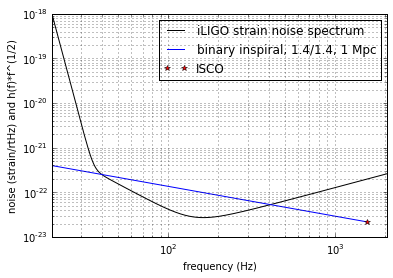

In [15]:
# plot it against the noise curve
plt.figure(11)
plt.loglog(f,np.sqrt(Sf),'k')
plt.loglog(fI,hf*np.sqrt(fI)/BNS_horizon,'b')   # end this at fGWI
plt.loglog(fI[-1],hf[-1]*np.sqrt(fI[-1])/BNS_horizon,'r*')   # end this at fGWI
plt.xlabel('frequency (Hz)')
plt.ylabel('noise (strain/rtHz) and h(f)*f^(1/2)')
plt.legend(['iLIGO strain noise spectrum','binary inspiral, 1.4/1.4, 1 Mpc','ISCO'])
plt.xlim([20, 2048])
plt.ylim([1.e-23, 1.e-18])
plt.grid(True,'both')
plt.show()

In [16]:
# Question 17:
# rate of BNS mergers per year:
print SNR
BNS_range = SNR/8./horizon_to_average
# compute sensitive volume, neglecting cosmological effects
Sensitive_volume = 4./3.*pi*BNS_range**3
# BNS rate per cubic Mpc per year:
BNS_rate_density = 1.e-6
BNS_rate = BNS_rate_density*Sensitive_volume
print "BNS range = ", BNS_range
print "BNS rate = ", BNS_rate

251.681445708
BNS range =  13.920433944
BNS rate =  0.0112991800936


In [17]:
# Question 18:
# Well, all you need to do is change the masses near the top, 
# and repeat all the following steps.
# LOOK at the numbers to develop the intuition of the 
# orbital separations, f_ISCO, energetics, etc.

In [18]:
# Question 19:
# loop over masses, compute horizon distance for binary inspiral.
# If needed, make this loop faster by computing constants at the start.
ms = np.arange(2.,200.,0.2)
Dhor = []
Dist = 1.e6*pc    # 1 Mpc
for M in ms*Msun:
    # Mu = (M/2.)*(M/2.)/M
    # Mchirp = M**(2./5.)*Mu**(3./5.)   # chirp mass
    Mchirp = M*(1./4.)**(3./5.)   # chirp mass
    # compute the frequency at ISCO:
    # aorbI = 6.*G*M/c**2
    # fGWI = np.sqrt(G*M/aorbI**3)/pi
    fGWI = 1./(6.**(3./2.)*pi*G*M/c**3)
    # frequency vectors should end at ISCO:
    fI = f[f < fGWI]
    SfI = Sf[f< fGWI]
    # GW strain h(f) in frequency domain,
    # optimal location and orientation, distance Dist:
    hf = np.sqrt(5*pi/24.)*G**2*Mchirp**2/(c**5*Dist)* \
         np.power(pi*G*Mchirp*fI/c**3,-7./6.)
    # the expected SNR for a CBC at Dist.
    SNR = np.sqrt(4.*np.sum(hf*hf/SfI)*df)
    Dhor.append(SNR/8.)    # horizon distance

# put the python list into a numpy array:
Dhor = np.array(Dhor)    

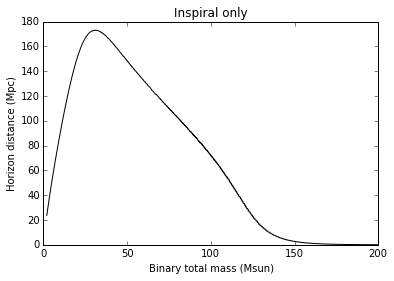

In [19]:
# Question 19: plot horizon distance vs total mass:
plt.figure(12)
plt.plot(ms,Dhor,'k')
plt.xlabel('Binary total mass (Msun)')
plt.ylabel('Horizon distance (Mpc)')
plt.title('Inspiral only')
plt.show()

In [20]:
# Now use the aLIGO noise curve (in a text file)
fname = 'ZERO_DET_high_P.txt'
data = np.loadtxt(fname)
f = data[:,0]          # frequency vector
nspec = data[:,1]      # ASD (strain / rtHz)
Sf = nspec**2          # PSD(strain**2 / Hz)
#
# and a PhenomC (IMR) waveform (m1 = m2 = 3, D = 1 Mpc).
fname = 'phenomc_3-3.txt'
datw = np.loadtxt(fname)
fw = datw[:,0]         # frequency vector
hw = datw[:,1]         # h(f) (strain/Hz)
m10 = 3.               # m1 = m2 = m10 in units of Msun
ec = 0.25**(3./5.)     # mass ratio factor for m1=m2
mc0 = 2.*m10*ec        # chirp mass in units of Msun

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log


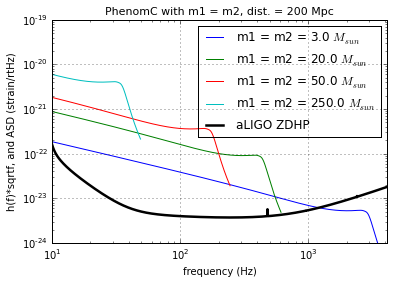

In [21]:
# scale the waveform and plot against the ASD

f_min = 10.            # starting GW frequency (Hz)
f_max = 4096.          # ending GW frequency (Hz)
Dist = 200.            # Mpc
pow = 2.               # scale the waveform by a power of Mchirp

titl = 'PhenomC with m1 = m2, dist. = 200 Mpc'
plt.figure()

# a waveform with m1 = m2 = 3
m1 = 3.
mc = 2.*m1*ec
fw1 = fw*m10/m1     # scale the frequency vector
hws = (mc/mc0)**(pow)*hw*np.sqrt(fw1)/Dist # scale the waveform
hw1 = np.exp(np.interp(f,fw1,np.log(hws))) # interpolate to ASD 
plt.loglog(f, hw1,label='m1 = m2 = '+str(m1)+r' $M_{sun}$')

# and other masses:
m1 = 20.
mc = 2.*m1*ec
fw1 = fw*m10/m1
hws = (mc/mc0)**(pow)*hw/Dist*np.sqrt(fw1)
hw1 = np.exp(np.interp(f,fw1,np.log(hws)))
plt.loglog(f, hw1,label='m1 = m2 = '+str(m1)+r' $M_{sun}$')

m1 = 50.
mc = 2.*m1*ec
fw1 = fw*m10/m1
hws = (mc/mc0)**(pow)*hw/Dist*np.sqrt(fw1)
hw1 = np.exp(np.interp(f,fw1,np.log(hws)))
plt.loglog(f, hw1,label='m1 = m2 = '+str(m1)+r' $M_{sun}$')

m1 = 250.
mc = 2.*m1*ec
fw1 = fw*m10/m1
hws = (mc/mc0)**(pow)*hw/Dist*np.sqrt(fw1)
hw1 = np.exp(np.interp(f,fw1,np.log(hws)))
plt.loglog(f, hw1,label='m1 = m2 = '+str(m1)+r' $M_{sun}$')

plt.plot(f,nspec,'k',label="aLIGO ZDHP",linewidth=2.5)
plt.xlim([f_min, f_max])
plt.ylim([1.e-24, 1.e-19])
plt.xlabel('frequency (Hz)')
plt.ylabel('h(f)*sqrtf, and ASD (strain/rtHz)')
plt.grid()
plt.legend()
plt.title(titl,fontsize=11)
# plt.savefig("wf2.png")
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log


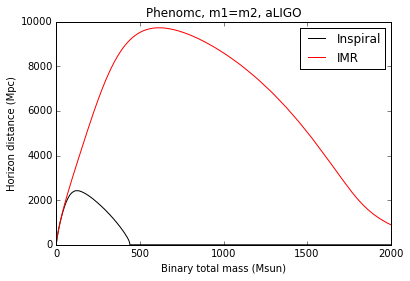

In [22]:
# Question 20: plot horizon vs mass, for aLIGO and IMR waveform, m1=m2

f_min = 10.      #starting GW frequency (Hz)
f_max = 4096.    #ending GW frequency (Hz)

# masses in SI units for waveform scaling
M0 = 2.*3.*Msun
Mc0 = M0*(1./4.)**(3./5.)
df = f[2]-f[1]
pow = 2.

# loop over masses, compute horizon distance for binary inspiral.
# If needed, make this loop faster by computing constants at the start.
ms = np.arange(2.,2000.,1.)
#ms = np.arange(2.,400.,1.)
DhorI = []
DhorIMR = []
for M in ms*Msun:
    # Mu = (M/2.)*(M/2.)/M
    # Mchirp = M**(2./5.)*Mu**(3./5.)   # chirp mass
    Mchirp = M*(1./4.)**(3./5.)   # chirp mass
    # compute the frequency at ISCO:
    # aorbI = 6.*G*M/c**2
    # fGWI = np.sqrt(G*M/aorbI**3)/pi
    fGWI = 1./(6.**(3./2.)*pi*G*M/c**3)
    # frequency vectors should end at ISCO:
    fI = f[(f < fGWI) & (f > f_min)]
    SfI = Sf[(f< fGWI) & (f > f_min)]

    # now for the IMR waveform:
    fw1 = fw*M0/M
    hws = (Mchirp/Mc0)**(pow)*hw
    hw1 = np.exp(np.interp(fI,fw1,np.log(hws)))
    SNR = np.sqrt(4.*np.sum(hw1**2/SfI)*df)
    DhorI.append(SNR/8.)    # horizon distance
    fI = f[(f < f_max) & (f > f_min)]
    SfI = Sf[(f< f_max) & (f > f_min)]
    hw1 = np.exp(np.interp(fI,fw1,np.log(hws)))
    SNR = np.sqrt(4.*np.sum(hw1**2/SfI)*df)
    DhorIMR.append(SNR/8.)    # horizon distance
    #print 'debug:',M/Msun,hf[:4]/hw1[:4]

# put the python list into a numpy array:
DhorI = np.array(DhorI)    
DhorIMR = np.array(DhorIMR)    

plt.figure()
plt.plot(ms,DhorI,'k',label='Inspiral')
plt.plot(ms,DhorIMR,'r',label='IMR')
plt.xlabel('Binary total mass (Msun)')
plt.ylabel('Horizon distance (Mpc)')
plt.legend(loc=1)
plt.title('Phenomc, m1=m2, aLIGO')
#plt.savefig("wf3.png")
plt.show()
